In [1]:
from RegressionEnv import RegressionClass
from sklearn.linear_model import LinearRegression, HuberRegressor
import numpy as np

In [2]:
feature_steps = 15
target_steps = 15

ModelLR = RegressionClass(feature_steps=feature_steps,target_steps=target_steps,tickers = ['spy'])

for m in [LinearRegression,HuberRegressor]:
    ModelLR.Prediction(m)


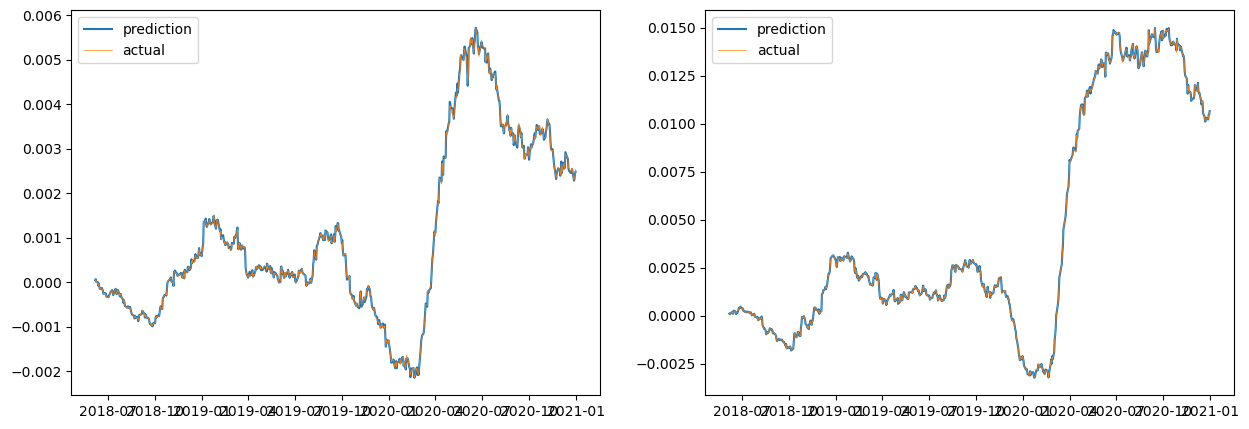

C:\Users\yoshi\AppData\Local\Temp\ipykernel_12700\1378434266.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[var].legend(loc='upper left')


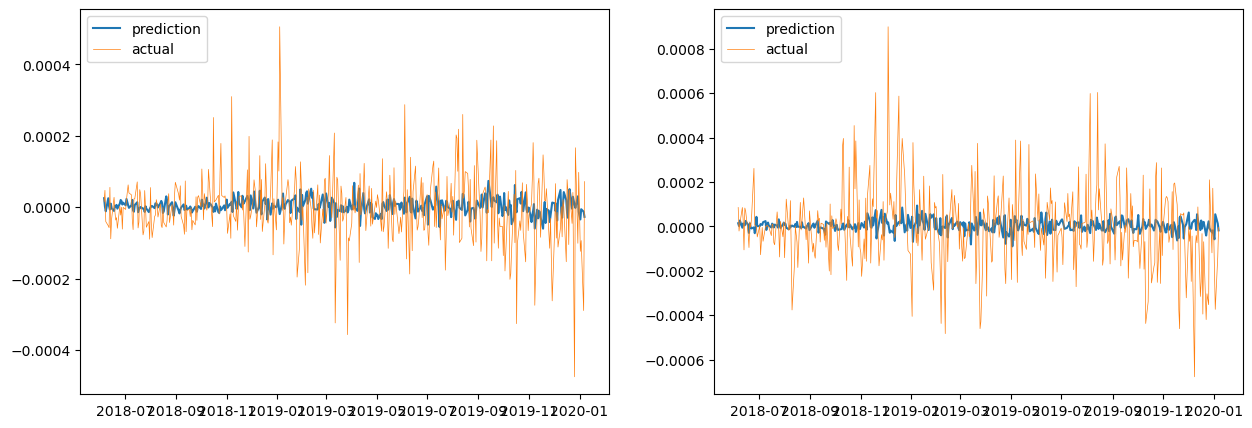

[[1.         0.99998291]
 [0.99998291 1.        ]]
[[1.         0.03328384]
 [0.03328384 1.        ]]


In [3]:
import matplotlib.pyplot as plt

T = len(ModelLR.tickers)

mod = 0  #SimpleRNN and LinearRegression = 0, LSTM and HuberRegressor= 1

ticker = 'spy'

fig, axes = plt.subplots(1, 2, figsize=(15, 5*T))
k = list(ModelLR.test_pred[ticker].keys())
pred = ModelLR.scaler[ticker].inverse_transform(ModelLR.test_pred[ticker][k[mod]])
test = ModelLR.scaler[ticker].inverse_transform(ModelLR.y_test[ticker])

for var in [0,1]:
    predvar = pred[:,var]
    testvar = test[:,var]
    test_full = np.cumsum(testvar)
    pred_full = test_full+predvar
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]],pred_full, label = "prediction")
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]],test_full, label = "actual", linewidth=0.5)
    axes[var].legend(loc='upper left')

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5*T))
for var in [0,1]:
    predvar = pred[:,var]
    testvar = test[:,var]

    axes[var].legend(loc='upper left')
    TT = 400
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][:TT],predvar[:TT], label = "prediction")
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][:TT],testvar[:TT], label = "actual", linewidth=0.5)
    axes[var].legend(loc='upper left')

# Show the plot
plt.show()

print(np.corrcoef(test_full,pred_full))
print(np.corrcoef(testvar,predvar))

In [4]:
y = 0
N = len(pred_full)
for n in range(target_steps,N):
    if np.sign(test_full[n]-test_full[n-target_steps]) == np.sign(pred_full[n]-test_full[n-target_steps]):
        y += 1

print(y)
print(N)
print(y/N)

622
649
0.9583975346687211
